# MNIST BASIC APPROACH

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('./mnist_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
single_img = mnist.train.images[1].reshape(28,28)

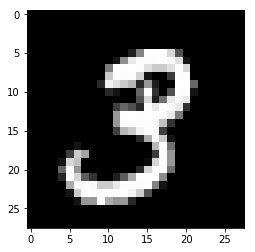

In [11]:
plt.imshow(single_img, cmap = 'gist_gray')

In [12]:
single_img.min(), single_img.max()

(0.0, 1.0)

In [13]:
#Placeholder
x = tf.placeholder(tf.float32, shape = [None,784])

In [14]:
#Variables

w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
#create graph operations

y = tf.matmul(x,w) + b

In [16]:
#Loss functions
y_true = tf.placeholder(tf.float32,[None,10])

In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [18]:
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [19]:
#create session
init  = tf.global_variables_initializer()

In [23]:
#create Session
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
    
    #evaluate the model
    
    correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9171
